<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/dspt_phase_4_Time_series_analysis_and_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis and modelling

**Overview of the lecture**

1. Overview of time series data
2. Time series data visualization
3. Time series modelling

## Overview of time series data

**Time series analysis** is a statistical technique used to analyze and model data points collected over time.

**Time series data** consists of observations taken at successive points in time, often at regular intervals.

![link text](https://www.influxdata.com/wp-content/uploads/time-series-data-weather-data.png)

Examples of time series data include stock prices, weather patterns etc.

*Name others you can think of*

There are several key components of time series analysis, including:

1. **Trend**: The overall direction of the data over time.  
2. **Seasonality**: Patterns that repeat at regular intervals, such as daily, weekly, or yearly.
3. **Cyclical fluctuations**: Longer-term patterns that do not repeat at regular intervals.
4. **Irregularity**: Random fluctuations in the data that cannot be explained by trend, seasonality, or cycles.

**Types of Trends**

### No Trend

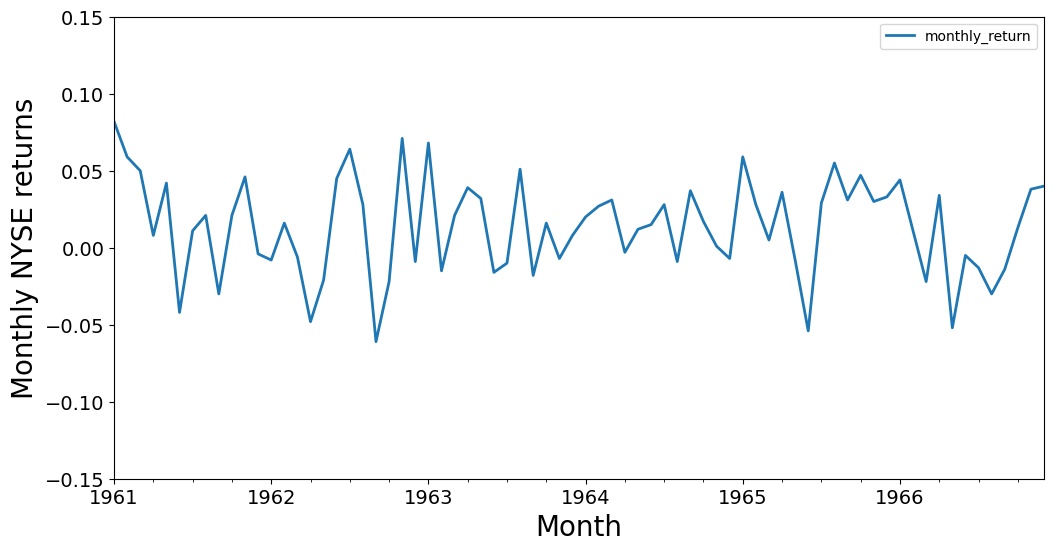

### Linear Trend

Upward or downward

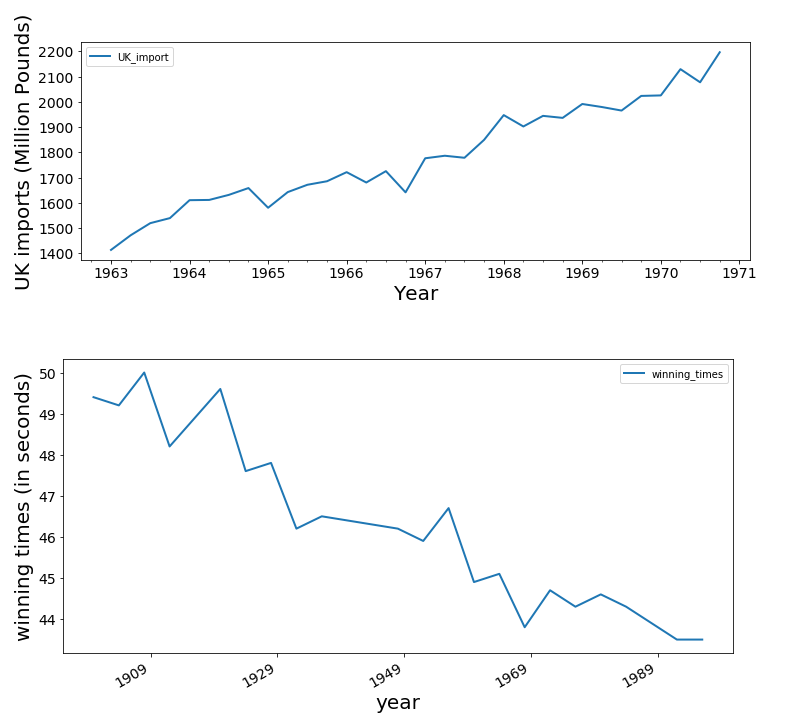

![](images/linear_trend-downward.png)

### Exponential

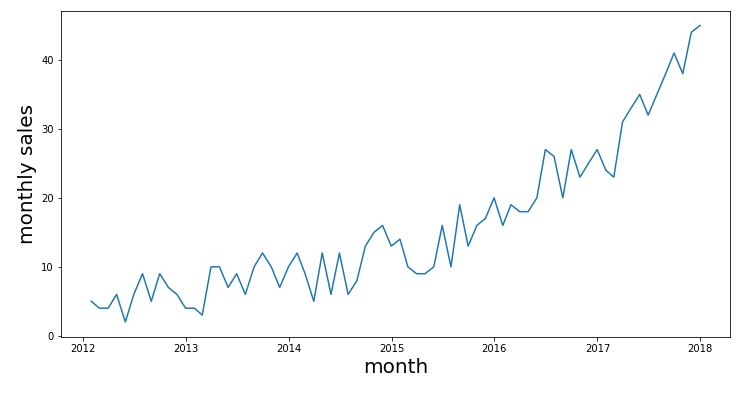

### Periodic

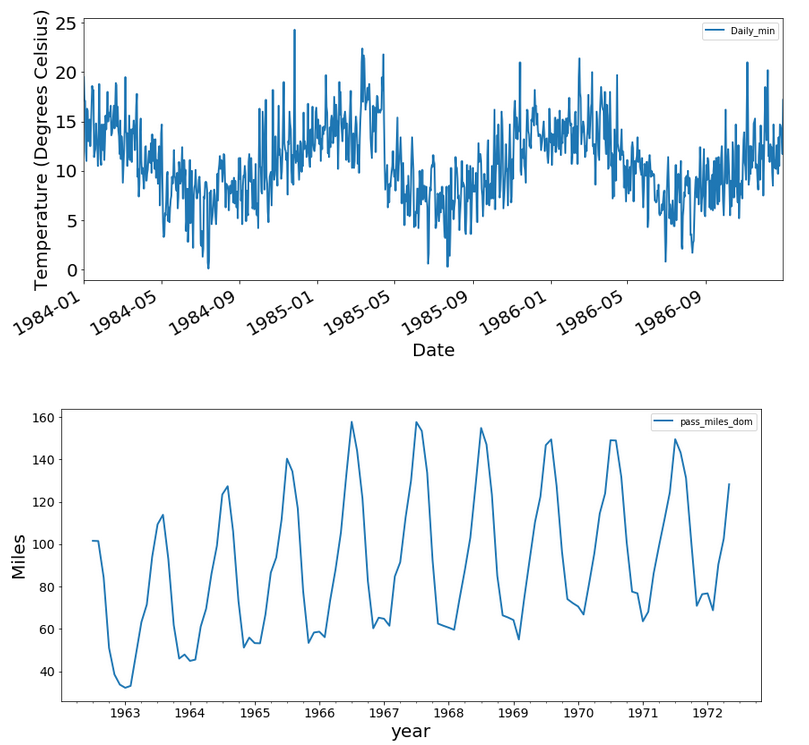

![](images/periodic_trend-miles.png)

**Time series modeling** is a statistical technique used to analyze and make predictions about time series data.

There are several types of time series models, including:

1. Autoregressive (AR) models: AR models predict future values based on past values of the same variable. These models assume that future values depend on a linear combination of past values, with the weights decreasing as the time lag increases.

2. Moving average (MA) models: MA models predict future values based on past forecast errors. These models assume that future values depend on a linear combination of past forecast errors, with the weights decreasing as the time lag increases.

3. Autoregressive integrated moving average (ARIMA) models: ARIMA models combine the AR and MA models, and also incorporate differencing to remove trend and seasonality. ARIMA models are widely used in time series modeling due to their flexibility and ability to handle complex patterns in the data.

4. Seasonal ARIMA (SARIMA) models: SARIMA models are an extension of ARIMA models that include seasonality components. They are used when there is a clear seasonal pattern in the data.

5. Prophet models: Prophet is a forecasting model developed by Facebook that incorporates both trend and seasonality, as well as holidays and other events that can affect the data. It is designed to be easy to use and requires minimal tuning.

The accuracy of time series models can be evaluated using metrics such as **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.

## Visualizing and modelling walkthrough

The walkthrough will be done in the following way:

1. I will analyse and/or visualize stock data from a particular company.
2. I will break you into group to analyse stock data for other companies and present it.

By the end of the walkthrough, we should be able to analyse and model time series data.

#### Loading data

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
amzn = yf.Ticker('STAR')

In [ ]:
print(amzn)

yfinance.Ticker object <STAR>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = yf.download("AMZN",start='2010-01-01')

df = pd.DataFrame(data)
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


<Axes: xlabel='Date'>

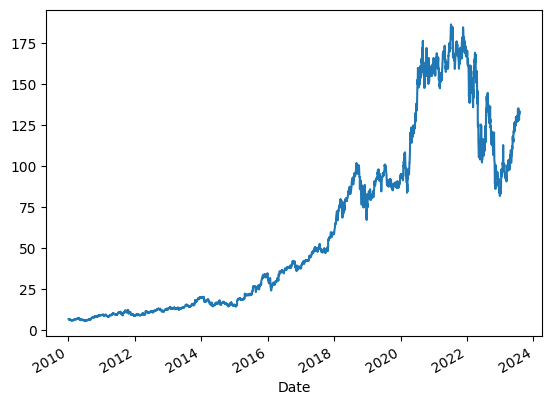

In [ ]:
df['Adj Close'].plot()

In [ ]:
df['Returns'] = df['Adj Close'].shift(1) - df['Adj Close']
df['Returns']

Date
2010-01-04         NaN
2010-01-05   -0.039500
2010-01-06    0.122000
2010-01-07    0.112500
2010-01-08   -0.176000
                ...   
2023-07-26    0.980011
2023-07-27   -0.100006
2023-07-28   -3.960007
2023-07-31   -1.469986
2023-08-01    1.485794
Name: Returns, Length: 3417, dtype: float64

In [ ]:
df.dropna(inplace=True)

<Axes: xlabel='Date'>

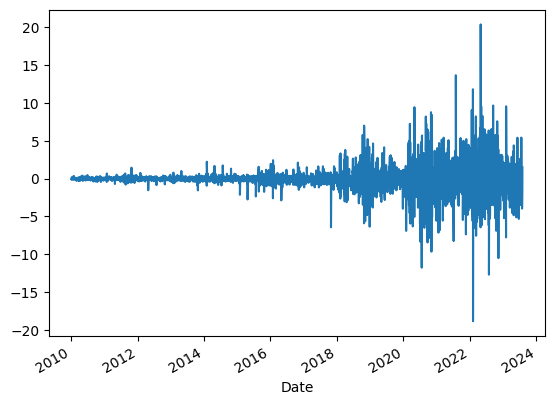

In [ ]:
df['Returns'].plot()

In [ ]:
df2 = df.head(50)

<Axes: xlabel='Date'>

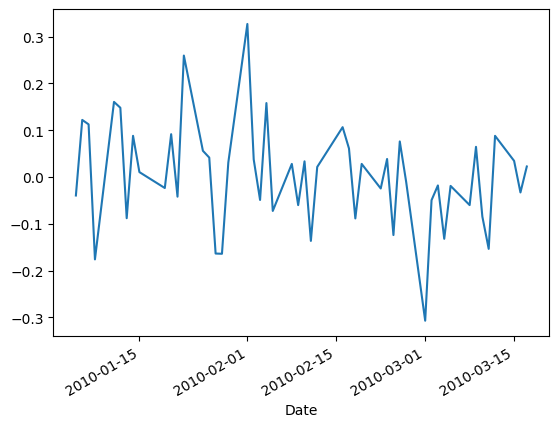

In [ ]:
df2['Returns'].plot()

In [ ]:
df['real'] = df['Adj Close']/df['Adj Close'].shift(1)

Ways of removing trend

1. Differencing
2. Log transformation
3. Subtract rolling mean
4. Decomposition

etc, based on your mathematical creativity

P(t) = P(t-1) + ϵ

P(t) = x*election + P(t-1) -regression, neural networks

In [ ]:
Complex model

<Axes: xlabel='Date'>

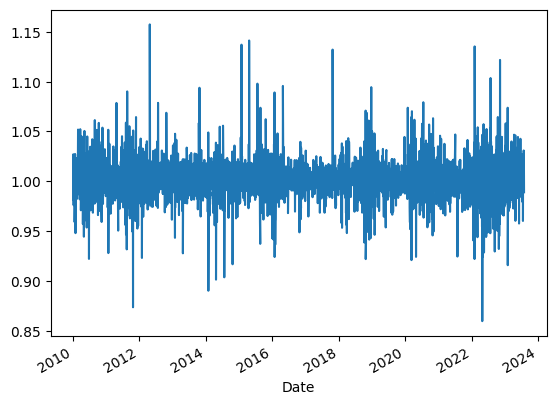

In [ ]:
df['real'].plot()

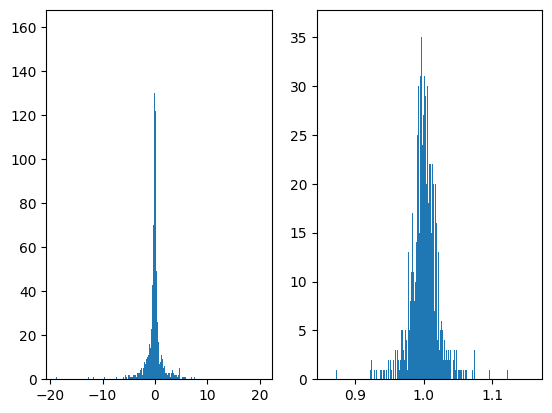

In [ ]:
f, (ax1, ax2) =plt.subplots(1,2)

ax1.hist(df['Returns'], bins=1000)
ax2.hist(df['real'], bins=1000)
plt.show()

In [ ]:
import statsmodels.api as sm

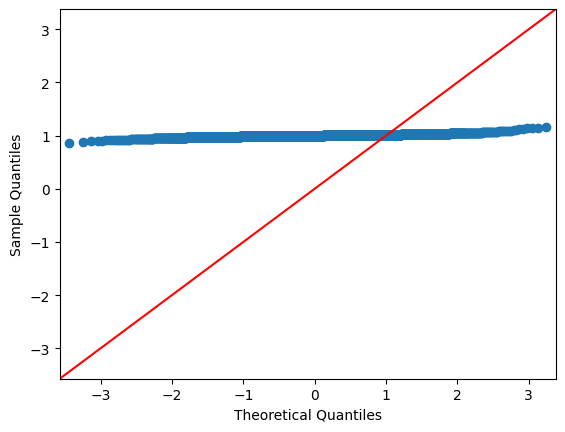

In [ ]:
fig = sm.qqplot(df['real'], line ='45')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

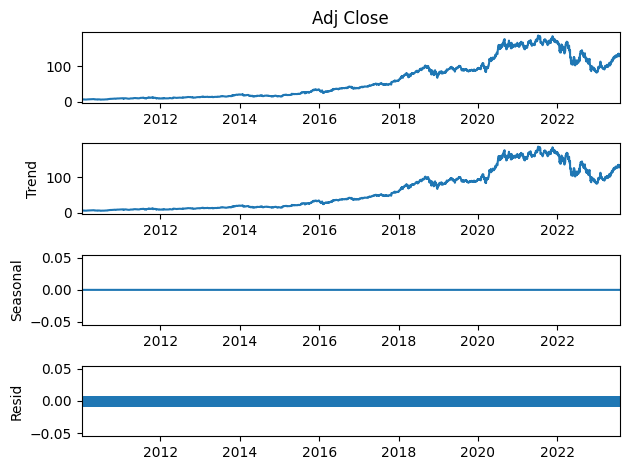

In [ ]:
result = seasonal_decompose(df['Adj Close'], model = 'additive', period=1)
result.plot()
plt.show()

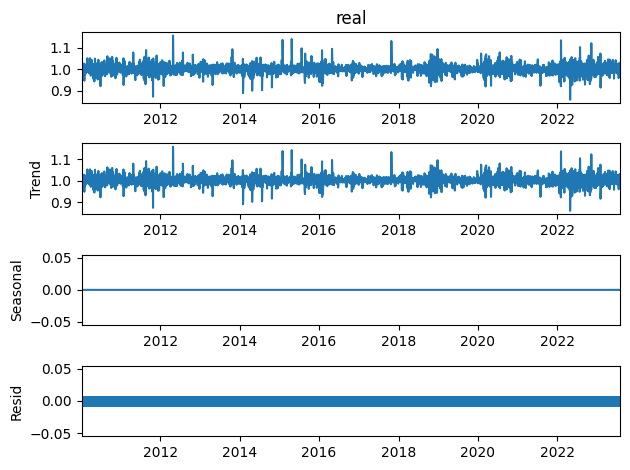

In [ ]:
result = seasonal_decompose(df['real'].dropna(), model = 'additive', period=1)
result.plot()
plt.show()

### Modelling

1. Moving average

1,2,3,1,4,------2.5,3.25  
1,2,3,1,4-------2.7,2.6

P(t) = ∑P(previous_w)/w

2. Autoregressive

P(t) = Θ *P(previous) + ε

3. ARIMA

P(t) = ∑P(previous_w)/w + Θ *P(previous) + ε terms

Moving average but adding regression

In [ ]:
df['MA20'] = df['real'].rolling(window=20).mean()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['real'].values[-365:],df['MA20'].values[-365:])
mse

0.0007781757520174662

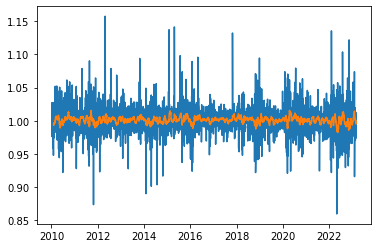

In [ ]:
plt.plot(df['real'])
plt.plot(df['MA20'])

ARIMA

In [ ]:
train_data = df['real'][:-365].dropna()
test_data = df['real'][-365:]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(train_data,order = (1,1,1))
model_fit = model.fit(disp=0)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [ ]:
predictions

2944    1.001445
2945    1.001498
2946    1.001497
2947    1.001497
2948    1.001497
          ...   
3304    1.001545
3305    1.001545
3306    1.001545
3307    1.001545
3308    1.001545
Length: 365, dtype: float64